# Yammer Customers Analysis 

# Outline
Yammer is a social network for communicating with coworkers. Individuals share documents,
updates, and ideas by posting them in groups. Yammer is free to use indefinitely, but
companies must pay license fees if they want access to administrative controls, including
integration with user management systems like ActiveDirectory. You sit in their centralized
Analytics team, which sits in the Engineering organization.

It has been observed a very steep cliff into the weekly customer engagment. What caused the drop in user engagement? Based on what you observe in the data, what recommendations would you make to the organization?

# Key findings
Analysing the data we found:

- The main problem could be related to the some issue on the mobile connectivity. In fact, grouping the user activity in 3 categories (computer, phone, tablet), it seems that the deepest descrease is about users try to connecting with phone and tablets.

- Furthermore, it should be some problem with the emails. In fact, checking the emails it seems users got some problem with link, maybe. Because "email_clickthrough" event really shows a deep fall into user engagment.

## Explorative Data Analysis

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
# Upload the data
df_users = pd.read_csv("yammer_users.csv")

In [3]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       19066 non-null  float64
 1   created_at    19066 non-null  object 
 2   company_id    19066 non-null  float64
 3   language      19066 non-null  object 
 4   activated_at  9381 non-null   object 
 5   state         19066 non-null  object 
dtypes: float64(2), object(4)
memory usage: 893.8+ KB


In [15]:
df_users['created_at'] = pd.to_datetime(df_users['created_at'])
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       19066 non-null  float64       
 1   created_at    19066 non-null  datetime64[ns]
 2   company_id    19066 non-null  float64       
 3   language      19066 non-null  object        
 4   activated_at  9381 non-null   object        
 5   state         19066 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 893.8+ KB


In [16]:
df_users['activated_at'] = pd.to_datetime(df_users['activated_at'])
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       19066 non-null  float64       
 1   created_at    19066 non-null  datetime64[ns]
 2   company_id    19066 non-null  float64       
 3   language      19066 non-null  object        
 4   activated_at  9381 non-null   datetime64[ns]
 5   state         19066 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 893.8+ KB


In [4]:
df1_events = pd.read_csv("yammer_events_1.csv")
df1_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170416 entries, 0 to 170415
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   170416 non-null  int64  
 1   user_id      170416 non-null  float64
 2   occurred_at  170416 non-null  object 
 3   event_type   170416 non-null  object 
 4   event_name   170416 non-null  object 
 5   location     170416 non-null  object 
 6   device       170416 non-null  object 
 7   user_type    154839 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 10.4+ MB


In [5]:
df1_events.head()

,Unnamed: 0,user_id,occurred_at,event_type,event_name,location,device,user_type
0,0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [6]:
df2_events = pd.read_csv("yammer_events_2.csv")
df2_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170416 entries, 0 to 170415
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   170416 non-null  int64  
 1   user_id      170416 non-null  float64
 2   occurred_at  170416 non-null  object 
 3   event_type   170416 non-null  object 
 4   event_name   170416 non-null  object 
 5   location     170416 non-null  object 
 6   device       170416 non-null  object 
 7   user_type    170416 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 10.4+ MB


In [7]:
df2_events.head()

,Unnamed: 0,user_id,occurred_at,event_type,event_name,location,device,user_type
0,170416,7754.0,2014-06-26 08:41:54,engagement,like_message,United States,amazon fire phone,1.0
1,170417,7754.0,2014-06-26 08:42:24,engagement,send_message,United States,amazon fire phone,1.0
2,170418,7754.0,2014-06-26 08:42:37,engagement,home_page,United States,amazon fire phone,1.0
3,170419,7754.0,2014-06-26 08:43:06,engagement,send_message,United States,amazon fire phone,1.0
4,170420,7754.0,2014-06-26 08:43:43,engagement,home_page,United States,amazon fire phone,1.0


In [8]:
#The two dfs seems equal let append them to create a single df
df_events = df1_events.append(df2_events, ignore_index = True)
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340832 entries, 0 to 340831
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   340832 non-null  int64  
 1   user_id      340832 non-null  float64
 2   occurred_at  340832 non-null  object 
 3   event_type   340832 non-null  object 
 4   event_name   340832 non-null  object 
 5   location     340832 non-null  object 
 6   device       340832 non-null  object 
 7   user_type    325255 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 20.8+ MB


In [9]:
#Deal with dates
df_events['occurred_at']=pd.to_datetime(df_events['occurred_at'])
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340832 entries, 0 to 340831
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   340832 non-null  int64         
 1   user_id      340832 non-null  float64       
 2   occurred_at  340832 non-null  datetime64[ns]
 3   event_type   340832 non-null  object        
 4   event_name   340832 non-null  object        
 5   location     340832 non-null  object        
 6   device       340832 non-null  object        
 7   user_type    325255 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 20.8+ MB


In [10]:
df_emails= pd.read_csv("yammer_emails.csv")
df_emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90389 entries, 0 to 90388
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      90389 non-null  float64
 1   occurred_at  90389 non-null  object 
 2   action       90389 non-null  object 
 3   user_type    90389 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.8+ MB


In [11]:
df_emails.head(3)

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0


In [19]:
df_emails['occurred_at'] = pd.to_datetime(df_emails['occurred_at'])
df_emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90389 entries, 0 to 90388
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      90389 non-null  float64       
 1   occurred_at  90389 non-null  datetime64[ns]
 2   action       90389 non-null  object        
 3   user_type    90389 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.8+ MB


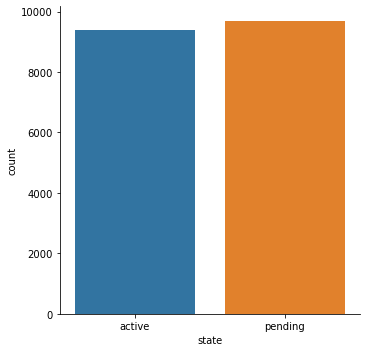

In [14]:
# How many users are active or pending..
sns.catplot(x='state', kind= 'count', data = df_users)

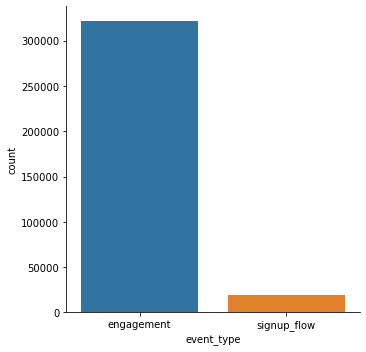

In [20]:
# How many types of events
sns.catplot(x='event_type', kind='count', data =df_events)

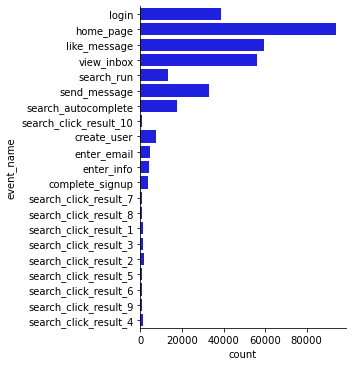

In [27]:
# How many types of events
g=sns.catplot(y='event_name', kind='count', color='b', data =df_events)
#g.set_xticklabels(rotation=30)

In [22]:
len(df_events['event_name'].unique())

21

In [34]:
#How many type of locations
len(df_events['location'].unique())

47

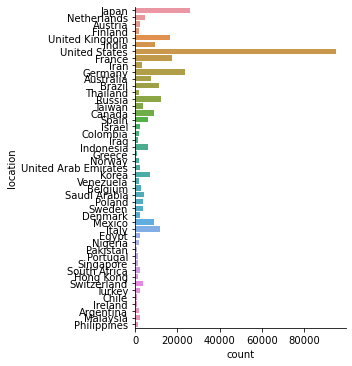

In [35]:
g=sns.catplot(y='location', kind='count', data=df_events)

In [36]:
# How many devices
len(df_events['device'].unique())

26

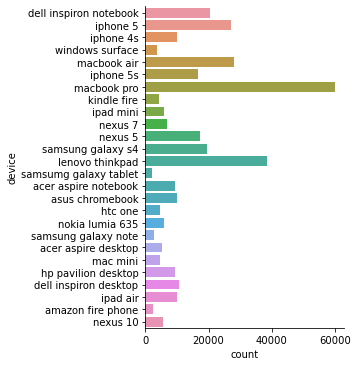

In [37]:
g=sns.catplot(y='device', kind='count', data=df_events)

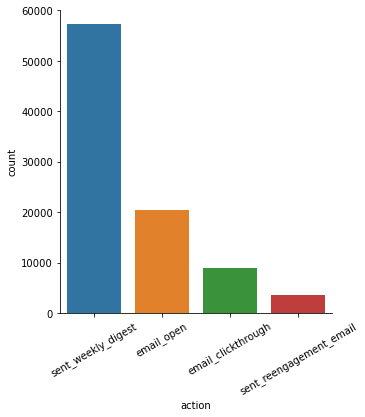

In [32]:
#how many action in the emails
g=sns.catplot(x='action', kind='count', data=df_emails)
g.set_xticklabels(rotation=30)

## Which is the definition of active user?
I would like to understand how the plot that reveal the problem has been created to check the behaviour of that metric taking into account other variables as type of activity, location, device...

In [39]:
#Add the week number into events table
df_events['week_number'] = df_events['occurred_at'].dt.week

In [40]:
df_events.head(3)

,Unnamed: 0,user_id,occurred_at,event_type,event_name,location,device,user_type,week_number
0,0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,18
1,1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,18
2,2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,18


In [44]:
#Count how many events per week
events_per_week = df_events.groupby('week_number').count().reset_index()

In [45]:
events_per_week

,week_number,Unnamed: 0,user_id,occurred_at,event_type,event_name,location,device,user_type
0,18,9149,9149,9149,9149,9149,9149,9149,8790
1,19,18416,18416,18416,18416,18416,18416,18416,17692
2,20,18007,18007,18007,18007,18007,18007,18007,17233
3,21,18845,18845,18845,18845,18845,18845,18845,18067
4,22,18171,18171,18171,18171,18171,18171,18171,17379
5,23,19651,19651,19651,19651,19651,19651,19651,18805
6,24,19306,19306,19306,19306,19306,19306,19306,18431
7,25,20112,20112,20112,20112,20112,20112,20112,19198
8,26,19940,19940,19940,19940,19940,19940,19940,19069
9,27,20016,20016,20016,20016,20016,20016,20016,19158


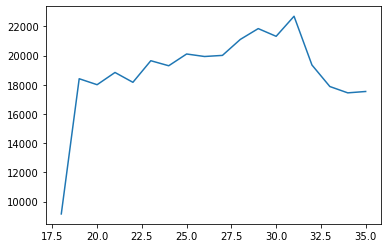

In [49]:
# take a look at the plot
plt.plot(events_per_week['week_number'], events_per_week['event_type'])

In [55]:
#Count how many events per week per user
events_per_week_per_user = df_events.groupby(['week_number', 'user_id']).count().reset_index()

In [53]:
events_per_week_per_user.head()

,week_number,user_id,Unnamed: 0,occurred_at,event_type,event_name,location,device,user_type
0,18,8.0,2,2,2,2,2,2,2
1,18,22.0,8,8,8,8,8,8,8
2,18,66.0,14,14,14,14,14,14,14
3,18,163.0,22,22,22,22,22,22,22
4,18,172.0,15,15,15,15,15,15,15


In [59]:
active_user_per_week = events_per_week_per_user.groupby('week_number')['user_id'].count().reset_index()
active_user_per_week

,week_number,user_id
0,18,791
1,19,1244
2,20,1270
3,21,1341
4,22,1293
5,23,1366
6,24,1434
7,25,1462
8,26,1443
9,27,1477


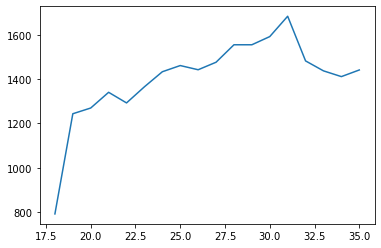

In [61]:
plt.plot(active_user_per_week['week_number'], active_user_per_week['user_id'])

Now that I know the metric I can check the dependency from many factors.Like the type of user, active or pending...or the type of events. But in order to do this, I need to join the df_users and df_events.

In [63]:
# Join the df_users and df_events
df_user_and_events = df_users.merge(df_events, how='left', on='user_id')
df_user_and_events.head(20)

,user_id,created_at,company_id,language,activated_at,state,Unnamed: 0,occurred_at,event_type,event_name,location,device,user_type,week_number
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2013-01-01 13:07:46,28.0,english,NaT,pending,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2013-01-01 10:59:05,51.0,english,NaT,pending,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51582.0,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,20.0
5,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51583.0,2014-05-13 09:32:10,engagement,home_page,India,lenovo thinkpad,3.0,20.0
6,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51584.0,2014-05-13 09:32:26,engagement,search_autocomplete,India,lenovo thinkpad,3.0,20.0
7,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51585.0,2014-05-13 09:32:58,engagement,search_autocomplete,India,lenovo thinkpad,3.0,20.0
8,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51586.0,2014-05-24 11:39:53,engagement,login,India,samsung galaxy s4,3.0,21.0
9,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51587.0,2014-05-24 11:40:20,engagement,home_page,India,samsung galaxy s4,3.0,21.0


In [64]:
df_user_and_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350138 entries, 0 to 350137
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       350138 non-null  float64       
 1   created_at    350138 non-null  datetime64[ns]
 2   company_id    350138 non-null  float64       
 3   language      350138 non-null  object        
 4   activated_at  339534 non-null  datetime64[ns]
 5   state         350138 non-null  object        
 6   Unnamed: 0    340832 non-null  float64       
 7   occurred_at   340832 non-null  datetime64[ns]
 8   event_type    340832 non-null  object        
 9   event_name    340832 non-null  object        
 10  location      340832 non-null  object        
 11  device        340832 non-null  object        
 12  user_type     325255 non-null  float64       
 13  week_number   340832 non-null  float64       
dtypes: datetime64[ns](3), float64(5), object(6)
memory usage: 40.1+ MB


Now I can count and plot according different variables...

In [69]:
#Count how many events per week per user
active_events_per_week_per_user = df_user_and_events[df_user_and_events['state'] == 'active']

In [70]:
active_events_per_week_per_user.head(10)

,user_id,created_at,company_id,language,activated_at,state,Unnamed: 0,occurred_at,event_type,event_name,location,device,user_type,week_number
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51582.0,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,20.0
5,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51583.0,2014-05-13 09:32:10,engagement,home_page,India,lenovo thinkpad,3.0,20.0
6,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51584.0,2014-05-13 09:32:26,engagement,search_autocomplete,India,lenovo thinkpad,3.0,20.0
7,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51585.0,2014-05-13 09:32:58,engagement,search_autocomplete,India,lenovo thinkpad,3.0,20.0
8,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51586.0,2014-05-24 11:39:53,engagement,login,India,samsung galaxy s4,3.0,21.0
9,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51587.0,2014-05-24 11:40:20,engagement,home_page,India,samsung galaxy s4,3.0,21.0
10,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51588.0,2014-05-31 15:58:46,engagement,login,India,lenovo thinkpad,3.0,22.0
11,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51589.0,2014-05-31 15:59:16,engagement,home_page,India,lenovo thinkpad,3.0,22.0


In [84]:
active_events_per_week_per_user.groupby(['week_number', 'user_id']).agg(
    count_rows=pd.NamedAgg(column='event_type', aggfunc="count")).reset_index()

,week_number,user_id,count_rows
0,18.0,8.0,2
1,18.0,22.0,8
2,18.0,66.0,14
3,18.0,163.0,22
4,18.0,172.0,15
...,...,...,...
21663,35.0,19056.0,11
21664,35.0,19059.0,6
21665,35.0,19060.0,12
21666,35.0,19061.0,12


In [85]:
active_user_per_week = active_events_per_week_per_user.groupby('week_number')['user_id'].count().reset_index()
active_user_per_week

,week_number,user_id
0,18.0,9033
1,19.0,18172
2,20.0,17791
3,21.0,18598
4,22.0,17937
5,23.0,19396
6,24.0,19025
7,25.0,19864
8,26.0,19699
9,27.0,19755


In [86]:
active_user_per_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   week_number  18 non-null     float64
 1   user_id      18 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 416.0 bytes


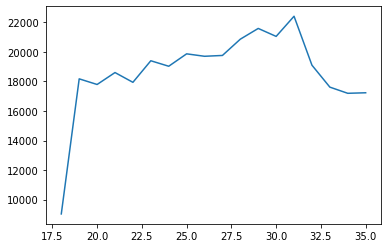

In [87]:
plt.plot(active_user_per_week['week_number'], active_user_per_week['user_id'])

## Check the type of connections, maybe there is a problem connecting with pc, mobile or tablet
We need to group the devices according their names...

In [92]:
events_device = active_events_per_week_per_user[ (active_events_per_week_per_user.event_type=='engagement') & (active_events_per_week_per_user.event_name == 'login')]

In [100]:
events_device.head()

,user_id,created_at,company_id,language,activated_at,state,Unnamed: 0,occurred_at,event_type,event_name,location,device,user_type,week_number,device_type
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51582.0,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,20.0,NA
8,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51586.0,2014-05-24 11:39:53,engagement,login,India,samsung galaxy s4,3.0,21.0,NA
10,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51588.0,2014-05-31 15:58:46,engagement,login,India,lenovo thinkpad,3.0,22.0,NA
20,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51598.0,2014-05-20 09:31:30,engagement,login,India,samsung galaxy s4,3.0,21.0,NA
26,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51604.0,2014-05-27 15:09:09,engagement,login,India,lenovo thinkpad,3.0,22.0,NA


In [101]:
events_device.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38610 entries, 4 to 350128
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       38610 non-null  float64       
 1   created_at    38610 non-null  datetime64[ns]
 2   company_id    38610 non-null  float64       
 3   language      38610 non-null  object        
 4   activated_at  38610 non-null  datetime64[ns]
 5   state         38610 non-null  object        
 6   Unnamed: 0    38610 non-null  float64       
 7   occurred_at   38610 non-null  datetime64[ns]
 8   event_type    38610 non-null  object        
 9   event_name    38610 non-null  object        
 10  location      38610 non-null  object        
 11  device        38610 non-null  object        
 12  user_type     38610 non-null  float64       
 13  week_number   38610 non-null  float64       
 14  device_type   38610 non-null  object        
dtypes: datetime64[ns](3), float64(5), o

In [93]:
events_device['device'].unique()

array(['lenovo thinkpad', 'samsung galaxy s4', 'dell inspiron desktop',
       'nexus 7', 'macbook pro', 'iphone 5s', 'iphone 4s', 'ipad air',
       'iphone 5', 'kindle fire', 'asus chromebook', 'nexus 5',
       'hp pavilion desktop', 'macbook air', 'acer aspire notebook',
       'htc one', 'mac mini', 'amazon fire phone', 'acer aspire desktop',
       'dell inspiron notebook', 'nokia lumia 635', 'ipad mini',
       'nexus 10', 'windows surface', 'samsumg galaxy tablet',
       'samsung galaxy note'], dtype=object)

In [94]:
#Define vectors for device type
phone=['iphone 5','samsung galaxy s4','nexus 5','iphone 5s','iphone 4s','nokia lumia 635',
       'htc one','samsung galaxy note','amazon fire phone']
computer=['macbook pro','lenovo thinkpad','macbook air','dell inspiron notebook',
          'asus chromebook','dell inspiron desktop','acer aspire notebook','hp pavilion desktop','acer aspire desktop','mac mini']
tablet=['ipad air','nexus 7','ipad mini','nexus 10','kindle fire','windows surface',
        'samsumg galaxy tablet']

In [103]:
# Create a list then add to df 
device_type_list=[]
for element in events_device['device']:
    if element in phone:
        device_type_list.append('phone')
    if element in computer:
        device_type_list.append('computer')
    if element in tablet:
        device_type_list.append('tablet')

In [104]:
len(device_type_list)

38610

In [98]:
events_device['device_type']='NA'

<ipython-input-98-349320446c50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_device['device_type']='NA'


In [105]:
# Add the list to the df
events_device['device_type'] = device_type_list

<ipython-input-105-5cdb7739ffe7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_device['device_type'] = device_type_list


In [107]:
events_device['device_type'].value_counts()

computer    22301
phone       11999
tablet       4310
Name: device_type, dtype: int64

In [108]:
events_device.head()

,user_id,created_at,company_id,language,activated_at,state,Unnamed: 0,occurred_at,event_type,event_name,location,device,user_type,week_number,device_type
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51582.0,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,20.0,computer
8,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51586.0,2014-05-24 11:39:53,engagement,login,India,samsung galaxy s4,3.0,21.0,phone
10,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51588.0,2014-05-31 15:58:46,engagement,login,India,lenovo thinkpad,3.0,22.0,computer
20,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51598.0,2014-05-20 09:31:30,engagement,login,India,samsung galaxy s4,3.0,21.0,phone
26,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,51604.0,2014-05-27 15:09:09,engagement,login,India,lenovo thinkpad,3.0,22.0,computer


In [150]:
#Select user connected by certain device using a function
def check_by_device(df, dev_type):
    # Slice df
    device_active = df[df['device_type'] == dev_type]
    #Count how many events per week per user
    events_per_week_per_user = device_active.groupby(['week_number', 'user_id']).count().reset_index()
    # count again
    active_user_per_week = events_per_week_per_user.groupby('week_number')['user_id'].count().reset_index()
    # Plot
    plt.plot(active_user_per_week['week_number'], active_user_per_week['user_id'])
    plt.grid(True)
    plt.show()

In [134]:
device_active = events_device[events_device['device_type'] == 'computer']

In [135]:
events_per_week_per_user = device_active.groupby(['week_number', 'user_id']).count().reset_index()
events_per_week_per_user

,week_number,user_id,created_at,company_id,language,activated_at,state,Unnamed: 0,occurred_at,event_type,event_name,location,device,user_type,device_type
0,18.0,8.0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,18.0,22.0,1,1,1,1,1,1,1,1,1,1,1,1,1
2,18.0,66.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,18.0,163.0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,18.0,172.0,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14520,35.0,19050.0,1,1,1,1,1,1,1,1,1,1,1,1,1
14521,35.0,19053.0,1,1,1,1,1,1,1,1,1,1,1,1,1
14522,35.0,19055.0,1,1,1,1,1,1,1,1,1,1,1,1,1
14523,35.0,19056.0,1,1,1,1,1,1,1,1,1,1,1,1,1


In [136]:
active_user_per_week = events_per_week_per_user.groupby('week_number')['user_id'].count().reset_index()
active_user_per_week

,week_number,user_id
0,18.0,415
1,19.0,712
2,20.0,715
3,21.0,758
4,22.0,716
5,23.0,791
6,24.0,798
7,25.0,812
8,26.0,834
9,27.0,805


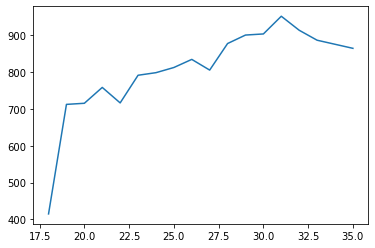

In [137]:
plt.plot(active_user_per_week['week_number'], active_user_per_week['user_id'])

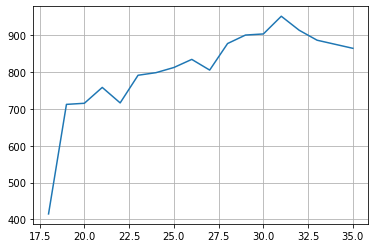

In [151]:
check_by_device(events_device, 'computer')

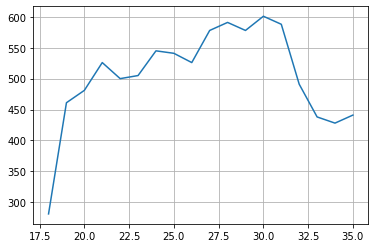

In [152]:
check_by_device(events_device, 'phone')

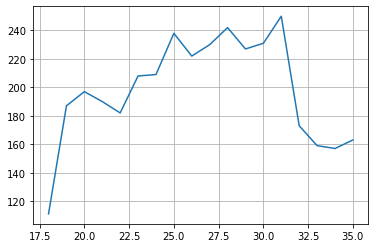

In [153]:
check_by_device(events_device, 'tablet')

## Check emails

In [154]:
df_emails.head(3)

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0


In [155]:
df_emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90389 entries, 0 to 90388
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      90389 non-null  float64       
 1   occurred_at  90389 non-null  datetime64[ns]
 2   action       90389 non-null  object        
 3   user_type    90389 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.8+ MB


In [156]:
df_emails['action'].unique()

array(['sent_weekly_digest', 'email_open', 'email_clickthrough',
       'sent_reengagement_email'], dtype=object)

In [157]:
# Merge with df_user
df_user_and_emails = df_users.merge(df_emails, how='left', on='user_id')
df_user_and_emails.head(20)

,user_id,created_at,company_id,language,activated_at,state,occurred_at,action,user_type
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,2014-06-03 09:30:00,sent_weekly_digest,1.0
5,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,2014-06-03 09:30:25,email_open,1.0
6,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,2014-06-10 09:30:00,sent_weekly_digest,1.0
7,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,2014-06-10 09:30:24,email_open,1.0
8,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,2014-06-17 09:30:00,sent_weekly_digest,1.0
9,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,2014-06-17 09:30:23,email_open,1.0


In [160]:
#Add the week number into events table
df_user_and_emails['week_number'] = df_user_and_emails['occurred_at'].dt.week

In [161]:
# define a new function to check according action...
def check_by_email(df, action_type):
    # Slice df
    eng_by_action = df[df['action'] == action_type]
    #Count how many events per week per user
    events_per_week_per_user = eng_by_action.groupby(['week_number', 'user_id']).count().reset_index()
    # count again
    active_user_per_week = events_per_week_per_user.groupby('week_number')['user_id'].count().reset_index()
    # Plot
    plt.plot(active_user_per_week['week_number'], active_user_per_week['user_id'])
    plt.grid(True)
    plt.show()

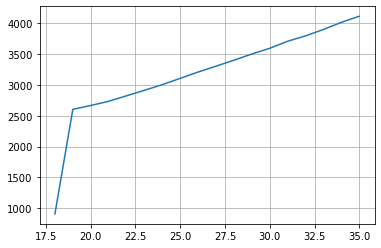

In [162]:
check_by_email(df_user_and_emails, 'sent_weekly_digest')

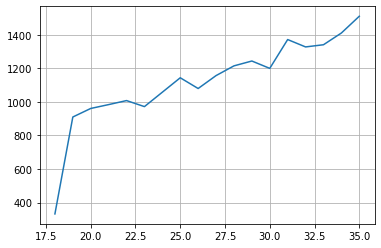

In [163]:
check_by_email(df_user_and_emails, 'email_open')

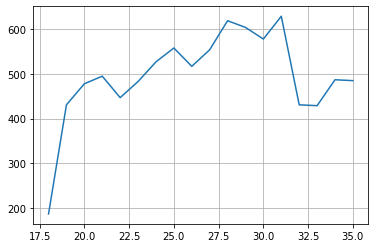

In [164]:
check_by_email(df_user_and_emails, 'email_clickthrough')

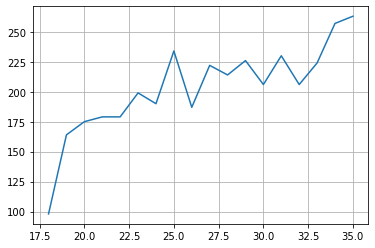

In [165]:
check_by_email(df_user_and_emails, 'sent_reengagement_email')